<a href="https://colab.research.google.com/github/nbegumc/Network-Analysis/blob/master/Game_of_Thrones_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
from operator import itemgetter

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
import pylab

In [ ]:
got_graph=nx.Graph()

In [ ]:
with open('got_nodes.txt', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprehension and list slicing to remove the header row)
    node = [n for n in nodereader][1:]
    
nodes = [n[0] for n in node] # Get a list of only the node names

with open('got_edges.txt', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e[0:3]) for e in edgereader][1:] # Retrieve the edges along with the weights

In [ ]:
print(len(nodes))
print(len(edges))

107
352


In [ ]:
got_graph.add_nodes_from(nodes) # Add nodes to the Graph
got_graph.add_weighted_edges_from(edges,weight='Weight') # Add edges and edge weights to the Graph 
print(nx.info(got_graph)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 352
Average degree:   6.5794


In [ ]:
label_dict={}

for n in node: # Loop through the list, one row at a time
    label_dict[n[0]] = n[1]
 
  

In [ ]:
nx.set_node_attributes(got_graph, label_dict, 'label')


In [ ]:
for n in got_graph.nodes:
    print(n, got_graph.nodes[n]['label'])

Aemon Aemon
Grenn Grenn
Samwell Samwell
Aerys Aerys
Jaime Jaime
Robert Robert
Tyrion Tyrion
Tywin Tywin
Alliser Alliser
Mance Mance
Amory Amory
Oberyn Oberyn
Arya Arya
Anguy Anguy
Beric Beric
Bran Bran
Brynden Brynden
Cersei Cersei
Gendry Gendry
Gregor Gregor
Joffrey Joffrey
Jon Jon
Rickon Rickon
Roose Roose
Sandor Sandor
Thoros Thoros
Balon Balon
Loras Loras
Belwas Belwas
Barristan Barristan
Illyrio Illyrio
Hodor Hodor
Jojen Jojen
Luwin Luwin
Meera Meera
Nan Nan
Theon Theon
Brienne Brienne
Bronn Bronn
Podrick Podrick
Lothar Lothar
Walder Walder
Catelyn Catelyn
Edmure Edmure
Hoster Hoster
Jeyne Jeyne
Lysa Lysa
Petyr Petyr
Robb Robb
Roslin Roslin
Sansa Sansa
Stannis Stannis
Elia Elia
Ilyn Ilyn
Meryn Meryn
Pycelle Pycelle
Shae Shae
Varys Varys
Craster Craster
Karl Karl
Daario Daario
Drogo Drogo
Irri Irri
Daenerys Daenerys
Aegon Aegon
Jorah Jorah
Kraznys Kraznys
Missandei Missandei
Rakharo Rakharo
Rhaegar Rhaegar
Viserys Viserys
Worm Worm
Davos Davos
Cressen Cressen
Salladhor Salladhor
Ed

In [ ]:
nx.write_gexf(G=got_graph,path="got_graph.gexf")

### DEGREE ANALYSIS

In [ ]:
#  degree method 
got_graph_degree = list(dict(got_graph.degree()).values())

print(got_graph_degree)

[5, 4, 15, 4, 24, 18, 36, 22, 3, 12, 1, 7, 19, 2, 6, 14, 8, 20, 4, 12, 18, 26, 6, 4, 13, 5, 6, 9, 4, 6, 1, 4, 4, 2, 5, 2, 4, 7, 4, 5, 5, 8, 18, 8, 3, 2, 10, 7, 25, 4, 26, 14, 5, 6, 7, 4, 5, 7, 5, 1, 4, 4, 4, 14, 1, 6, 1, 2, 1, 6, 3, 1, 5, 1, 1, 12, 3, 4, 1, 8, 5, 6, 2, 6, 7, 4, 3, 4, 1, 5, 4, 2, 4, 4, 2, 1, 2, 3, 3, 2, 3, 2, 1, 2, 1, 1, 1]


In [ ]:
# basic statistics
print(np.mean(got_graph_degree))
print(np.median(got_graph_degree))
print(np.std(got_graph_degree))
print(np.max(got_graph_degree))
print(np.min(got_graph_degree))

6.579439252336448
4.0
6.580965732013492
36
1


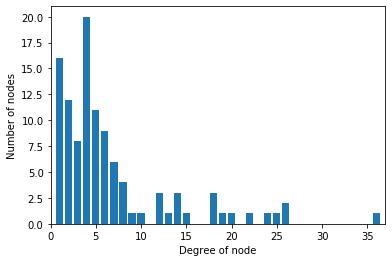

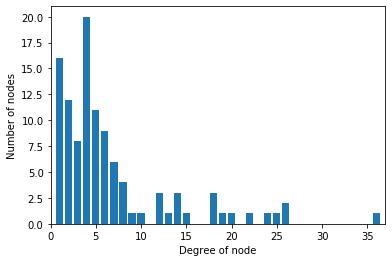

In [ ]:
def make_histogram(aGraph):     
    fig = pylab.figure()
    hist = nx.degree_histogram(aGraph)
    pylab.bar(range(len(hist)), hist, align = 'center')
    pylab.xlim((0, len(hist)))
    pylab.xlabel("Degree of node")
    pylab.ylabel("Number of nodes")
    return fig
make_histogram(got_graph)

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

In [ ]:
degree_centrality = nx.degree_centrality(got_graph)
print(degree_centrality)

{'Aemon': 0.04716981132075471, 'Grenn': 0.03773584905660377, 'Samwell': 0.14150943396226415, 'Aerys': 0.03773584905660377, 'Jaime': 0.22641509433962265, 'Robert': 0.16981132075471697, 'Tyrion': 0.33962264150943394, 'Tywin': 0.20754716981132074, 'Alliser': 0.02830188679245283, 'Mance': 0.11320754716981132, 'Amory': 0.009433962264150943, 'Oberyn': 0.0660377358490566, 'Arya': 0.1792452830188679, 'Anguy': 0.018867924528301886, 'Beric': 0.05660377358490566, 'Bran': 0.1320754716981132, 'Brynden': 0.07547169811320754, 'Cersei': 0.18867924528301885, 'Gendry': 0.03773584905660377, 'Gregor': 0.11320754716981132, 'Joffrey': 0.16981132075471697, 'Jon': 0.24528301886792453, 'Rickon': 0.05660377358490566, 'Roose': 0.03773584905660377, 'Sandor': 0.12264150943396226, 'Thoros': 0.04716981132075471, 'Balon': 0.05660377358490566, 'Loras': 0.08490566037735849, 'Belwas': 0.03773584905660377, 'Barristan': 0.05660377358490566, 'Illyrio': 0.009433962264150943, 'Hodor': 0.03773584905660377, 'Jojen': 0.03773584

In [ ]:
#density (p=density)
density=nx.density(got_graph)
print('Density: {}'.format(density))

Density: 0.062070181625815554


In [ ]:
#betweenness centrality
betweenness_centrality=nx.betweenness_centrality(got_graph)
print(betweenness_centrality)

{'Aemon': 0.004622508177397137, 'Grenn': 5.989817310572027e-05, 'Samwell': 0.03227262859511145, 'Aerys': 0.0, 'Jaime': 0.09994344156136246, 'Robert': 0.2094523840293194, 'Tyrion': 0.19791284320277353, 'Tywin': 0.06553840423231058, 'Alliser': 0.0, 'Mance': 0.007275961371756524, 'Amory': 0.0, 'Oberyn': 0.01958014232946847, 'Arya': 0.07960711308183888, 'Anguy': 0.0, 'Beric': 0.0006091214266627511, 'Bran': 0.06301659941786954, 'Brynden': 0.004727134574764742, 'Cersei': 0.02674643287824232, 'Gendry': 0.0, 'Gregor': 0.005879915417737236, 'Joffrey': 0.025434099443917696, 'Jon': 0.22996466368473173, 'Rickon': 0.0007626320968639029, 'Roose': 0.0002629599012559427, 'Sandor': 0.014162278987154626, 'Thoros': 0.0019261823273239152, 'Balon': 0.0006281164805527878, 'Loras': 0.003780752291533962, 'Belwas': 0.018867924528301886, 'Barristan': 0.04011407489067884, 'Illyrio': 0.0, 'Hodor': 0.0021937273446681065, 'Jojen': 0.0004064518889316733, 'Luwin': 0.0, 'Meera': 0.0019922569692430686, 'Nan': 0.0, 'The

In [ ]:
# closeness centrality
closeness_centrality = nx.closeness_centrality(got_graph)
print(closeness_centrality)

{'Aemon': 0.3897058823529412, 'Grenn': 0.3302180685358255, 'Samwell': 0.38405797101449274, 'Aerys': 0.3925925925925926, 'Jaime': 0.4796380090497738, 'Robert': 0.5, 'Tyrion': 0.5120772946859904, 'Tywin': 0.4690265486725664, 'Alliser': 0.343042071197411, 'Mance': 0.3581081081081081, 'Amory': 0.2617283950617284, 'Oberyn': 0.35333333333333333, 'Arya': 0.48623853211009177, 'Anguy': 0.32919254658385094, 'Beric': 0.33865814696485624, 'Bran': 0.42063492063492064, 'Brynden': 0.375886524822695, 'Cersei': 0.4435146443514644, 'Gendry': 0.3333333333333333, 'Gregor': 0.40304182509505704, 'Joffrey': 0.43983402489626555, 'Jon': 0.4796380090497738, 'Rickon': 0.37857142857142856, 'Roose': 0.3581081081081081, 'Sandor': 0.41732283464566927, 'Thoros': 0.36177474402730375, 'Balon': 0.4061302681992337, 'Loras': 0.3897058823529412, 'Belwas': 0.2857142857142857, 'Barristan': 0.37992831541218636, 'Illyrio': 0.22268907563025211, 'Hodor': 0.33865814696485624, 'Jojen': 0.3136094674556213, 'Luwin': 0.29775280898876

In [ ]:
#Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(got_graph)
print(eigenvector_centrality)

{'Aemon': 0.044139030178631765, 'Grenn': 0.01947979427324889, 'Samwell': 0.0543463811965928, 'Aerys': 0.078330375654338, 'Jaime': 0.27366303653172797, 'Robert': 0.19958752278264225, 'Tyrion': 0.33663766254996313, 'Tywin': 0.2248558363286332, 'Alliser': 0.01648394019716699, 'Mance': 0.030760352562253686, 'Amory': 0.005955545728156814, 'Oberyn': 0.07867344685980789, 'Arya': 0.22293108897418834, 'Anguy': 0.020689472558261975, 'Beric': 0.05037480261481118, 'Bran': 0.11528707749525803, 'Brynden': 0.08301687589161551, 'Cersei': 0.24644869607730555, 'Gendry': 0.037123716279776765, 'Gregor': 0.16127156812112656, 'Joffrey': 0.23065949393794508, 'Jon': 0.14245476192376477, 'Rickon': 0.08127662112877643, 'Roose': 0.05808085817896897, 'Sandor': 0.1659268683467339, 'Thoros': 0.05116936381767867, 'Balon': 0.10341422105477018, 'Loras': 0.11890448588807408, 'Belwas': 0.005637228079906845, 'Barristan': 0.04094877787714187, 'Illyrio': 0.00042674093059720335, 'Hodor': 0.03062940075397417, 'Jojen': 0.0172

In [ ]:
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_betweenness = sorted(betweenness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_closeness = sorted(closeness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvector = sorted(eigenvector_centrality.items(),key = lambda x:x[1], reverse=True)[0]
print('degree:      ',hub_degree)
print('betweenness: ',hub_betweenness)
print('closeness:   ',hub_closeness)
print('eigenvector: ',hub_eigenvector)

#thats enough, dont have to calculate katz and pagerank for undirected graph.

degree:       ('Tyrion', 0.33962264150943394)
betweenness:  ('Jon', 0.22996466368473173)
closeness:    ('Tyrion', 0.5120772946859904)
eigenvector:  ('Tyrion', 0.33663766254996313)


### ECDF and ECCDF

Text(0, 0.5, 'ECCDF')

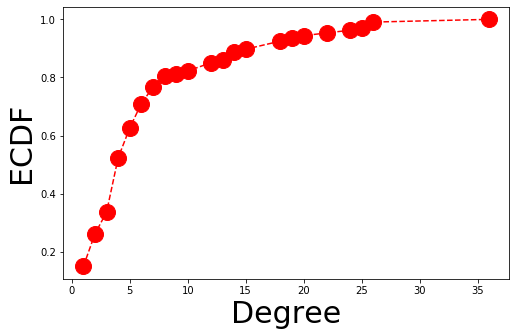

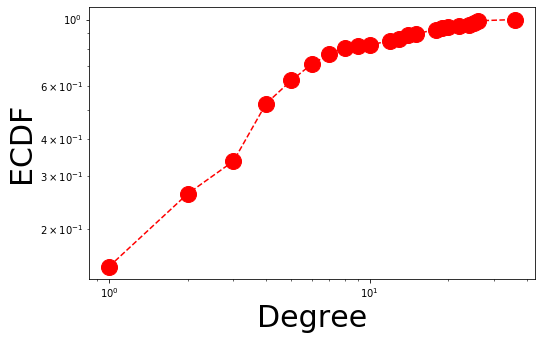

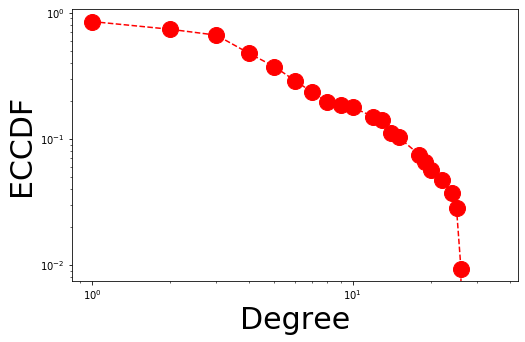

In [ ]:
# ECDF in linear scale
cdf_function = ECDF(got_graph_degree)
x = np.unique(got_graph_degree)
y = cdf_function(x)
fig_cdf_function = plt.figure(figsize=(8,5)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)

# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECDF',size = 30)

# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
axes.set_xlabel('Degree',size = 30)
axes.set_ylabel('ECCDF',size = 30)

### HUBS

Nodes with high degree. Fix the quantile in the CDF. given  𝑞∈[0,1]  find the degree  𝑘  such that  𝐹𝑋(𝑘)=𝑞 . We use the Numpy function percentile.  𝑞=0.95

In [ ]:
percentile_98 = np.percentile(got_graph_degree,98)
print(percentile_98)

25.879999999999995


Now we can identify the hubs by using the list comprehension

In [ ]:
hub_nodi = [k for k,v in dict(got_graph.degree()).items() if v>= percentile_98]
print(hub_nodi)

['Tyrion', 'Jon', 'Sansa']


In [ ]:
print(len(hub_nodi))
print(list(hub_nodi))

3
['Tyrion', 'Jon', 'Sansa']


In [ ]:
#### Isolates
print(list(nx.isolates(got_graph)))

[]


### Connectivity

In [ ]:
print(nx.is_connected(got_graph))
print(nx.number_connected_components(got_graph))

True
1


In [ ]:
nx.diameter(got_graph)
#The maximum shortest distance between a pair of nodes in a graph 

6

In [ ]:
(nx.average_shortest_path_length(got_graph)) 
#average of shortest paths between all possible pairs of nodes 

2.903897019925939

### Random networks: the Erdos-Renyi model

From
$$ <k> = p (N-1)$$
we obtain $p = \frac{<k>}{N-1}$

In [ ]:
mean_degree_got=np.mean(got_graph_degree)
p= mean_degree_got/(got_graph.order()-1)
p #same as the density of the network

0.062070181625815554

In [ ]:
random_graph = nx.fast_gnp_random_graph(got_graph.order(),p)

In [ ]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 107
Number of links: 372


In [ ]:
random_degree = list(dict(random_graph.degree()).values())
np.mean(random_degree) 

6.953271028037383

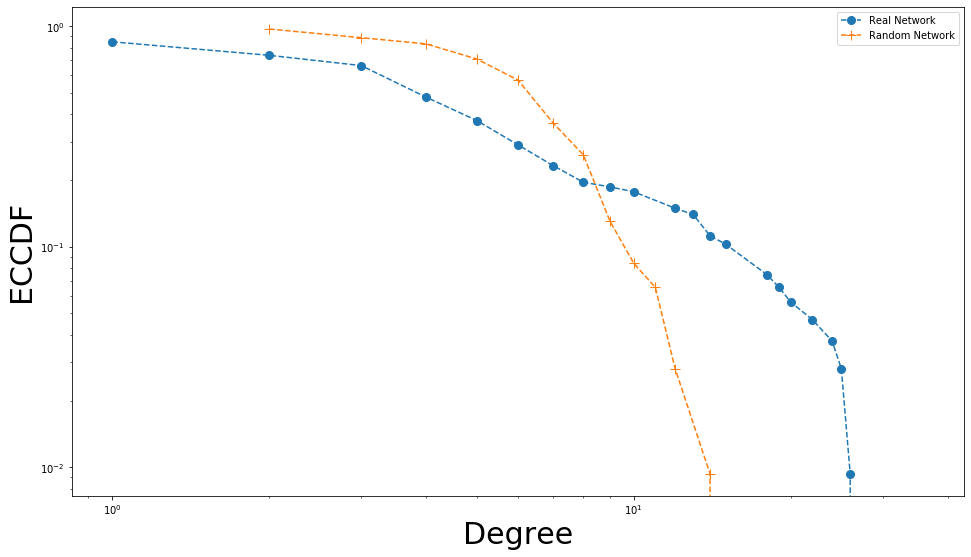

In [ ]:
cdf_got_graph = ECDF(got_graph_degree)
x_sw = np.unique(got_graph_degree)
y_sw = cdf_got_graph(x_sw)
cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)
fig_cdf_sw = plt.figure(figsize=(16,9))
assi = fig_cdf_sw.gca()
assi.set_xscale('log')
assi.set_yscale('log')
assi.loglog(x_sw,1-y_sw,marker='o',ms=8, linestyle='--', label='Real Network')
assi.plot(x_random,1-y_random,marker='+',ms=10, linestyle='--',label='Random Network')
assi.set_xlabel('Degree',size=30)
assi.set_ylabel('ECCDF', size = 30)
assi.legend(loc="upper right")

## Triangles

Note: When computing triangles for the entire graph each triangle is counted three times, once at each node. 
Note: Self loops are ignored.

In [ ]:
print('game of thrones graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(got_graph)))
print('game of thrones graph - number of triangles of node labelled Jon: {}'.format(nx.triangles(got_graph,'Jon')))
print('game of thrones graph - list of the number of triangles of all nodes: {}'.format(list(nx.triangles(got_graph).values())))

game of thrones graph - dictionary keyed by nodes: number of triangles {'Aemon': 7, 'Grenn': 5, 'Samwell': 25, 'Aerys': 6, 'Jaime': 77, 'Robert': 44, 'Tyrion': 114, 'Tywin': 53, 'Alliser': 3, 'Mance': 21, 'Amory': 0, 'Oberyn': 9, 'Arya': 57, 'Anguy': 1, 'Beric': 9, 'Bran': 29, 'Brynden': 13, 'Cersei': 68, 'Gendry': 6, 'Gregor': 36, 'Joffrey': 60, 'Jon': 51, 'Rickon': 12, 'Roose': 4, 'Sandor': 39, 'Thoros': 8, 'Balon': 12, 'Loras': 18, 'Belwas': 3, 'Barristan': 8, 'Illyrio': 0, 'Hodor': 4, 'Jojen': 5, 'Luwin': 1, 'Meera': 7, 'Nan': 1, 'Theon': 5, 'Brienne': 13, 'Bronn': 4, 'Podrick': 5, 'Lothar': 8, 'Walder': 17, 'Catelyn': 45, 'Edmure': 15, 'Hoster': 2, 'Jeyne': 1, 'Lysa': 16, 'Petyr': 15, 'Robb': 72, 'Roslin': 5, 'Sansa': 82, 'Stannis': 32, 'Elia': 6, 'Ilyn': 15, 'Meryn': 19, 'Pycelle': 6, 'Shae': 6, 'Varys': 11, 'Craster': 6, 'Karl': 0, 'Daario': 5, 'Drogo': 5, 'Irri': 4, 'Daenerys': 14, 'Aegon': 0, 'Jorah': 8, 'Kraznys': 0, 'Missandei': 1, 'Rakharo': 0, 'Rhaegar': 6, 'Viserys': 1, '

### Transitivity - Global Clustering Coefficient

a measure of the degree to which nodes in a graph tend to cluster together.

In [ ]:
transitivity=nx.transitivity(got_graph)
print(transitivity)
#transitivty gives more weights to high degree nodes

0.3286615276804485


### Local clustering coefficient

In [ ]:
got_local_clustering= nx.clustering(got_graph)
got_local_clustering['Jon']

0.15692307692307692

In [ ]:
greatestlocalclustering = sorted(got_local_clustering.items(),key = lambda x:x[1], reverse=True)
greatestlocalclustering

[('Aerys', 1.0),
 ('Alliser', 1.0),
 ('Anguy', 1.0),
 ('Gendry', 1.0),
 ('Luwin', 1.0),
 ('Nan', 1.0),
 ('Jeyne', 1.0),
 ('Ilyn', 1.0),
 ('Pycelle', 1.0),
 ('Missandei', 1.0),
 ('Eddison', 1.0),
 ('Gilly', 1.0),
 ('Bowen', 1.0),
 ('Dalla', 1.0),
 ('Rattleshirt', 1.0),
 ('Styr', 1.0),
 ('Ygritte', 1.0),
 ('Olenna', 1.0),
 ('Marillion', 1.0),
 ('Robert Arryn', 1.0),
 ('Ellaria', 1.0),
 ('Mace', 1.0),
 ('Rickard', 1.0),
 ('Chataya', 1.0),
 ('Meryn', 0.9047619047619048),
 ('Grenn', 0.8333333333333334),
 ('Jojen', 0.8333333333333334),
 ('Theon', 0.8333333333333334),
 ('Roslin', 0.8333333333333334),
 ('Daario', 0.8333333333333334),
 ('Drogo', 0.8333333333333334),
 ('Rickon', 0.8),
 ('Thoros', 0.8),
 ('Balon', 0.8),
 ('Lothar', 0.8),
 ('Qhorin', 0.8),
 ('Petyr', 0.7142857142857143),
 ('Aemon', 0.7),
 ('Meera', 0.7),
 ('Roose', 0.6666666666666666),
 ('Hodor', 0.6666666666666666),
 ('Bronn', 0.6666666666666666),
 ('Hoster', 0.6666666666666666),
 ('Irri', 0.6666666666666666),
 ('Myrcella', 0.666

Local clustering is interesting, rough dependence on degree in real network, 
vertices with higher degree having lower local clustering coef. on average
Local ccmeasures influence.
Betweennes and local CC are STRONGLY CORRELATED

when the neighbors of a node are not connected to one another we say the network structure contains STRUCTURAL HOLES

### Average Clustering Coefficient

In [ ]:
print('average local clustering: {}'.format(nx.average_clustering(got_graph)))

average local clustering: 0.551443151559996


In [ ]:
print('average local clustering: {}'.format(nx.average_clustering(random_graph)))

average local clustering: 0.07098674949142236


### Correlation

Pearson correlation coefficient and p-value for testing non-correlation. 
The Pearson correlation coefficient measures the linear relationship between two datasets 
It varies between -1 and +1 with 0 implying no correlation

In [ ]:
print(scipy.stats.pearsonr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print(scipy.stats.pearsonr(list(betweenness_centrality.values()),list(got_local_clustering.values())))

#buranın interpretation ını öğren

(0.906868857956235, 3.3590917220268116e-41)
(-0.32841063314613705, 0.0005533396252335149)


#### Degree Assortativity

In [ ]:
print(nx.degree_assortativity_coefficient(got_graph)) 
#buraya weighti ekle

-0.13076968366930292


In [ ]:
nx.write_gexf(G=got_graph,path='got_graph.gexf')

## COMMUNITY

### Communitiy detection with Greedy Algorithm

In [ ]:
import networkx.algorithms.community as nx_comm

In [ ]:
list_com_sets_greedy = list(nx_comm.greedy_modularity_communities(got_graph))
print(list_com_sets_greedy)

[frozenset({'Doran', 'Podrick', 'Tywin', 'Pycelle', 'Oberyn', 'Chataya', 'Sandor', 'Balon', 'Meryn', 'Ilyn', 'Myrcella', 'Amory', 'Tyrion', 'Mace', 'Renly', 'Qyburn', 'Olenna', 'Bronn', 'Walton', 'Varys', 'Margaery', 'Elia', 'Joffrey', 'Ellaria', 'Gregor', 'Lancel', 'Shae', 'Loras', 'Tommen', 'Jaime', 'Aerys', 'Kevan'}), frozenset({'Rattleshirt', 'Karl', 'Orell', 'Ygritte', 'Alliser', 'Grenn', 'Eddison', 'Cressen', 'Gilly', 'Styr', 'Craster', 'Dalla', 'Melisandre', 'Janos', 'Davos', 'Jon', 'Samwell', 'Mance', 'Qhorin', 'Hodor', 'Salladhor', 'Aemon', 'Val', 'Shireen', 'Stannis', 'Meera', 'Jojen', 'Bowen'}), frozenset({'Ramsay', 'Catelyn', 'Brienne', 'Arya', 'Lothar', 'Robb', 'Rickon', 'Rickard', 'Roose', 'Sansa', 'Roslin', 'Cersei', 'Eddard', 'Bran', 'Robert Arryn', 'Nan', 'Hoster', 'Jeyne', 'Theon', 'Walder', 'Luwin', 'Marillion', 'Brynden', 'Lysa', 'Edmure', 'Petyr'}), frozenset({'Illyrio', 'Kraznys', 'Daario', 'Worm', 'Robert', 'Drogo', 'Belwas', 'Rakharo', 'Barristan', 'Viserys', 'J

In [ ]:
partition_greedy = {}
for i, comm in enumerate(list_com_sets_greedy):
    print("Community:", i)
    print(i,comm)
    for n in comm:
        partition_greedy[n]=i

Community: 0
0 frozenset({'Doran', 'Podrick', 'Tywin', 'Pycelle', 'Oberyn', 'Chataya', 'Sandor', 'Balon', 'Meryn', 'Ilyn', 'Myrcella', 'Amory', 'Tyrion', 'Mace', 'Renly', 'Qyburn', 'Olenna', 'Bronn', 'Walton', 'Varys', 'Margaery', 'Elia', 'Joffrey', 'Ellaria', 'Gregor', 'Lancel', 'Shae', 'Loras', 'Tommen', 'Jaime', 'Aerys', 'Kevan'})
Community: 1
1 frozenset({'Rattleshirt', 'Karl', 'Orell', 'Ygritte', 'Alliser', 'Grenn', 'Eddison', 'Cressen', 'Gilly', 'Styr', 'Craster', 'Dalla', 'Melisandre', 'Janos', 'Davos', 'Jon', 'Samwell', 'Mance', 'Qhorin', 'Hodor', 'Salladhor', 'Aemon', 'Val', 'Shireen', 'Stannis', 'Meera', 'Jojen', 'Bowen'})
Community: 2
2 frozenset({'Ramsay', 'Catelyn', 'Brienne', 'Arya', 'Lothar', 'Robb', 'Rickon', 'Rickard', 'Roose', 'Sansa', 'Roslin', 'Cersei', 'Eddard', 'Bran', 'Robert Arryn', 'Nan', 'Hoster', 'Jeyne', 'Theon', 'Walder', 'Luwin', 'Marillion', 'Brynden', 'Lysa', 'Edmure', 'Petyr'})
Community: 3
3 frozenset({'Illyrio', 'Kraznys', 'Daario', 'Worm', 'Robert', 

In [ ]:
print(partition_greedy)

{'Doran': 0, 'Podrick': 0, 'Tywin': 0, 'Pycelle': 0, 'Oberyn': 0, 'Chataya': 0, 'Sandor': 0, 'Balon': 0, 'Meryn': 0, 'Ilyn': 0, 'Myrcella': 0, 'Amory': 0, 'Tyrion': 0, 'Mace': 0, 'Renly': 0, 'Qyburn': 0, 'Olenna': 0, 'Bronn': 0, 'Walton': 0, 'Varys': 0, 'Margaery': 0, 'Elia': 0, 'Joffrey': 0, 'Ellaria': 0, 'Gregor': 0, 'Lancel': 0, 'Shae': 0, 'Loras': 0, 'Tommen': 0, 'Jaime': 0, 'Aerys': 0, 'Kevan': 0, 'Rattleshirt': 1, 'Karl': 1, 'Orell': 1, 'Ygritte': 1, 'Alliser': 1, 'Grenn': 1, 'Eddison': 1, 'Cressen': 1, 'Gilly': 1, 'Styr': 1, 'Craster': 1, 'Dalla': 1, 'Melisandre': 1, 'Janos': 1, 'Davos': 1, 'Jon': 1, 'Samwell': 1, 'Mance': 1, 'Qhorin': 1, 'Hodor': 1, 'Salladhor': 1, 'Aemon': 1, 'Val': 1, 'Shireen': 1, 'Stannis': 1, 'Meera': 1, 'Jojen': 1, 'Bowen': 1, 'Ramsay': 2, 'Catelyn': 2, 'Brienne': 2, 'Arya': 2, 'Lothar': 2, 'Robb': 2, 'Rickon': 2, 'Rickard': 2, 'Roose': 2, 'Sansa': 2, 'Roslin': 2, 'Cersei': 2, 'Eddard': 2, 'Bran': 2, 'Robert Arryn': 2, 'Nan': 2, 'Hoster': 2, 'Jeyne': 2, '

In [ ]:
nx.set_node_attributes(got_graph, partition_greedy, "community_greedy")

In [ ]:
nx.write_gexf(G=got_graph,path="got_graph.gexf")

### Communitiy detection with Louvain Algorithm

In [ ]:
import community as community_louvain
import matplotlib.cm as cm

In [ ]:
partition_library = community_louvain.best_partition(got_graph)

In [ ]:
print(partition_library)

{'Aemon': 0, 'Grenn': 0, 'Samwell': 0, 'Aerys': 1, 'Jaime': 1, 'Robert': 2, 'Tyrion': 1, 'Tywin': 1, 'Alliser': 0, 'Mance': 0, 'Amory': 1, 'Oberyn': 1, 'Arya': 2, 'Anguy': 2, 'Beric': 2, 'Bran': 3, 'Brynden': 4, 'Cersei': 1, 'Gendry': 2, 'Gregor': 1, 'Joffrey': 1, 'Jon': 0, 'Rickon': 3, 'Roose': 4, 'Sandor': 2, 'Thoros': 2, 'Balon': 1, 'Loras': 1, 'Belwas': 5, 'Barristan': 5, 'Illyrio': 5, 'Hodor': 3, 'Jojen': 3, 'Luwin': 3, 'Meera': 3, 'Nan': 3, 'Theon': 3, 'Brienne': 4, 'Bronn': 1, 'Podrick': 1, 'Lothar': 4, 'Walder': 4, 'Catelyn': 4, 'Edmure': 4, 'Hoster': 4, 'Jeyne': 4, 'Lysa': 4, 'Petyr': 4, 'Robb': 4, 'Roslin': 4, 'Sansa': 1, 'Stannis': 0, 'Elia': 1, 'Ilyn': 1, 'Meryn': 1, 'Pycelle': 1, 'Shae': 1, 'Varys': 1, 'Craster': 0, 'Karl': 0, 'Daario': 5, 'Drogo': 5, 'Irri': 5, 'Daenerys': 5, 'Aegon': 5, 'Jorah': 5, 'Kraznys': 5, 'Missandei': 5, 'Rakharo': 5, 'Rhaegar': 5, 'Viserys': 5, 'Worm': 5, 'Davos': 0, 'Cressen': 0, 'Salladhor': 0, 'Eddard': 2, 'Eddison': 0, 'Gilly': 0, 'Qyburn': 1

In [ ]:
nx.set_node_attributes(got_graph, partition_library, "community_library")

In [ ]:
nx.write_gexf(G=got_graph,path="got_graph.gexf")

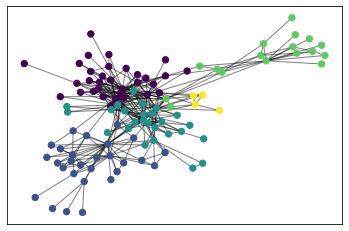

In [ ]:
# draw the graph with partition_greedy
pos = nx.spring_layout(got_graph)

cmap = cm.get_cmap('viridis', max(partition_greedy.values()) + 1)
nx.draw_networkx_nodes(got_graph, pos, partition_greedy.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition_greedy.values()))
nx.draw_networkx_edges(got_graph, pos, alpha=0.5)
plt.show()

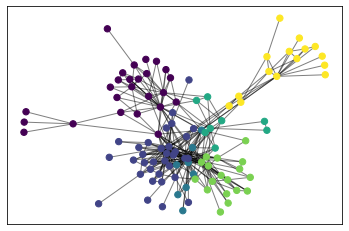

In [ ]:
# draw the graph with partition_library
pos = nx.spring_layout(got_graph)

cmap = cm.get_cmap('viridis', max(partition_library.values()) + 1)
nx.draw_networkx_nodes(got_graph, pos, partition_library.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(got_graph, pos, alpha=0.5)
plt.show()

### Communities ---EVALUATION

In [ ]:
comms = set(partition_library.values())
comms

{0, 1, 2, 3, 4, 5}

In [ ]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [ ]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library

[{'Aemon',
  'Alliser',
  'Bowen',
  'Craster',
  'Cressen',
  'Dalla',
  'Davos',
  'Eddison',
  'Gilly',
  'Grenn',
  'Janos',
  'Jon',
  'Karl',
  'Mance',
  'Melisandre',
  'Orell',
  'Qhorin',
  'Rattleshirt',
  'Salladhor',
  'Samwell',
  'Shireen',
  'Stannis',
  'Styr',
  'Val',
  'Ygritte'},
 {'Aerys',
  'Amory',
  'Balon',
  'Bronn',
  'Cersei',
  'Chataya',
  'Doran',
  'Elia',
  'Ellaria',
  'Gregor',
  'Ilyn',
  'Jaime',
  'Joffrey',
  'Kevan',
  'Lancel',
  'Loras',
  'Mace',
  'Margaery',
  'Meryn',
  'Myrcella',
  'Oberyn',
  'Olenna',
  'Podrick',
  'Pycelle',
  'Qyburn',
  'Renly',
  'Sansa',
  'Shae',
  'Tommen',
  'Tyrion',
  'Tywin',
  'Varys',
  'Walton'},
 {'Anguy', 'Arya', 'Beric', 'Eddard', 'Gendry', 'Robert', 'Sandor', 'Thoros'},
 {'Bran', 'Hodor', 'Jojen', 'Luwin', 'Meera', 'Nan', 'Rickon', 'Theon'},
 {'Brienne',
  'Brynden',
  'Catelyn',
  'Edmure',
  'Hoster',
  'Jeyne',
  'Jon Arryn',
  'Lothar',
  'Lysa',
  'Marillion',
  'Petyr',
  'Ramsay',
  'Rickard',

In [ ]:
for my_list in [list_com_sets_greedy,  list_community_sets_library]:
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(got_graph, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(got_graph, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(got_graph, my_list))
    
    print("---")

Coverage 0.7301136363636364
Modularity 0.45843152763429673
Performance 0.7921001587021689
---
Coverage 0.7301136363636364
Modularity 0.49333354855371847
Performance 0.8271909716099454
---


### Communitiy detection with k_clique_communities 
for overlapping communities

In [ ]:
from networkx.algorithms.community import k_clique_communities

In [ ]:
print("min size: 4", list(nx_comm.k_clique_communities(got_graph, 4)) ) # k (int) – Size of smallest clique)
print('---------------')
print("min size: 6", list(nx_comm.k_clique_communities(got_graph, 6)) ) # k (int) – Size of smallest clique)

min size: 4 [frozenset({'Daario', 'Drogo', 'Irri', 'Daenerys', 'Jorah'}), frozenset({'Catelyn', 'Podrick', 'Brienne', 'Tywin', 'Robert', 'Pycelle', 'Oberyn', 'Arya', 'Sandor', 'Lothar', 'Balon', 'Meryn', 'Ilyn', 'Robb', 'Rickon', 'Myrcella', 'Gendry', 'Tyrion', 'Sansa', 'Roslin', 'Roose', 'Cersei', 'Eddard', 'Bran', 'Mace', 'Renly', 'Beric', 'Bronn', 'Thoros', 'Varys', 'Jon', 'Theon', 'Margaery', 'Walder', 'Elia', 'Joffrey', 'Gregor', 'Shae', 'Loras', 'Brynden', 'Lysa', 'Tommen', 'Edmure', 'Petyr', 'Stannis', 'Jaime', 'Aerys', 'Kevan'}), frozenset({'Mance', 'Qhorin', 'Alliser', 'Rattleshirt', 'Jon', 'Samwell', 'Gilly', 'Craster', 'Ygritte', 'Janos'}), frozenset({'Robert', 'Belwas', 'Barristan', 'Daenerys', 'Jorah', 'Rhaegar'}), frozenset({'Grenn', 'Jon', 'Robert', 'Samwell', 'Eddison', 'Aemon', 'Stannis', 'Melisandre'}), frozenset({'Lysa', 'Robert Arryn', 'Marillion', 'Sansa'}), frozenset({'Hodor', 'Jon', 'Samwell', 'Bran', 'Meera', 'Jojen'}), frozenset({'Jon', 'Val', 'Dalla', 'Mance'}

In [ ]:
list_community_sets_kclique = nx_comm.k_clique_communities(got_graph, 4)

In [ ]:
map_4clique = {}

for i, kclique in enumerate(list_community_sets_kclique):
    print("Community:", i)
    print(i,kclique)
    for n in kclique:
        map_4clique[n]=i

Community: 0
0 frozenset({'Daario', 'Drogo', 'Irri', 'Daenerys', 'Jorah'})
Community: 1
1 frozenset({'Catelyn', 'Podrick', 'Brienne', 'Tywin', 'Robert', 'Pycelle', 'Oberyn', 'Arya', 'Sandor', 'Lothar', 'Balon', 'Meryn', 'Ilyn', 'Robb', 'Rickon', 'Myrcella', 'Gendry', 'Tyrion', 'Sansa', 'Roslin', 'Roose', 'Cersei', 'Eddard', 'Bran', 'Mace', 'Renly', 'Beric', 'Bronn', 'Thoros', 'Varys', 'Jon', 'Theon', 'Margaery', 'Walder', 'Elia', 'Joffrey', 'Gregor', 'Shae', 'Loras', 'Brynden', 'Lysa', 'Tommen', 'Edmure', 'Petyr', 'Stannis', 'Jaime', 'Aerys', 'Kevan'})
Community: 2
2 frozenset({'Mance', 'Qhorin', 'Alliser', 'Rattleshirt', 'Jon', 'Samwell', 'Gilly', 'Craster', 'Ygritte', 'Janos'})
Community: 3
3 frozenset({'Robert', 'Belwas', 'Barristan', 'Daenerys', 'Jorah', 'Rhaegar'})
Community: 4
4 frozenset({'Grenn', 'Jon', 'Robert', 'Samwell', 'Eddison', 'Aemon', 'Stannis', 'Melisandre'})
Community: 5
5 frozenset({'Lysa', 'Robert Arryn', 'Marillion', 'Sansa'})
Community: 6
6 frozenset({'Hodor', 'J

In [ ]:
map_4clique

{'Daario': 0,
 'Drogo': 0,
 'Irri': 0,
 'Daenerys': 3,
 'Jorah': 3,
 'Catelyn': 1,
 'Podrick': 1,
 'Brienne': 1,
 'Tywin': 1,
 'Robert': 4,
 'Pycelle': 1,
 'Oberyn': 1,
 'Arya': 1,
 'Sandor': 1,
 'Lothar': 1,
 'Balon': 1,
 'Meryn': 1,
 'Ilyn': 1,
 'Robb': 1,
 'Rickon': 1,
 'Myrcella': 1,
 'Gendry': 1,
 'Tyrion': 1,
 'Sansa': 5,
 'Roslin': 1,
 'Roose': 1,
 'Cersei': 1,
 'Eddard': 1,
 'Bran': 6,
 'Mace': 1,
 'Renly': 1,
 'Beric': 1,
 'Bronn': 1,
 'Thoros': 1,
 'Varys': 1,
 'Jon': 7,
 'Theon': 1,
 'Margaery': 1,
 'Walder': 1,
 'Elia': 1,
 'Joffrey': 1,
 'Gregor': 1,
 'Shae': 1,
 'Loras': 1,
 'Brynden': 1,
 'Lysa': 5,
 'Tommen': 1,
 'Edmure': 1,
 'Petyr': 1,
 'Stannis': 4,
 'Jaime': 1,
 'Aerys': 1,
 'Kevan': 1,
 'Mance': 7,
 'Qhorin': 2,
 'Alliser': 2,
 'Rattleshirt': 2,
 'Samwell': 6,
 'Gilly': 2,
 'Craster': 2,
 'Ygritte': 2,
 'Janos': 2,
 'Belwas': 3,
 'Barristan': 3,
 'Rhaegar': 3,
 'Grenn': 4,
 'Eddison': 4,
 'Aemon': 4,
 'Melisandre': 4,
 'Robert Arryn': 5,
 'Marillion': 5,
 'Hodor':

In [ ]:
nx.set_node_attributes(got_graph, map_4clique, "k4_clique_communities")

In [ ]:
list_community_sets_kclique = nx_comm.k_clique_communities(got_graph, 6)

map_6clique = {}

for i, kclique in enumerate(list_community_sets_kclique):
    print("Community:", i)
    print(i,kclique)
    for n in kclique:
        map_6clique[n]=i
nx.set_node_attributes(got_graph, map_6clique, "k6_clique_communities")

Community: 0
0 frozenset({'Sansa', 'Jon', 'Eddard', 'Arya', 'Bran', 'Robb', 'Rickon'})
Community: 1
1 frozenset({'Tywin', 'Robert', 'Arya', 'Joffrey', 'Sandor', 'Meryn', 'Ilyn', 'Robb', 'Gregor', 'Tyrion', 'Sansa', 'Cersei', 'Eddard', 'Jaime'})
Community: 2
2 frozenset({'Tyrion', 'Tywin', 'Joffrey', 'Stannis', 'Balon', 'Jaime', 'Robb'})


In [ ]:
nx.write_gexf(G=got_graph,path="got_graph.gexf")

### Size distribution of communities

In [ ]:
list_community_sets_library

[{'Aemon',
  'Alliser',
  'Bowen',
  'Craster',
  'Cressen',
  'Dalla',
  'Davos',
  'Eddison',
  'Gilly',
  'Grenn',
  'Janos',
  'Jon',
  'Karl',
  'Mance',
  'Melisandre',
  'Orell',
  'Qhorin',
  'Rattleshirt',
  'Salladhor',
  'Samwell',
  'Shireen',
  'Stannis',
  'Styr',
  'Val',
  'Ygritte'},
 {'Aerys',
  'Amory',
  'Balon',
  'Bronn',
  'Cersei',
  'Chataya',
  'Doran',
  'Elia',
  'Ellaria',
  'Gregor',
  'Ilyn',
  'Jaime',
  'Joffrey',
  'Kevan',
  'Lancel',
  'Loras',
  'Mace',
  'Margaery',
  'Meryn',
  'Myrcella',
  'Oberyn',
  'Olenna',
  'Podrick',
  'Pycelle',
  'Qyburn',
  'Renly',
  'Sansa',
  'Shae',
  'Tommen',
  'Tyrion',
  'Tywin',
  'Varys',
  'Walton'},
 {'Anguy', 'Arya', 'Beric', 'Eddard', 'Gendry', 'Robert', 'Sandor', 'Thoros'},
 {'Bran', 'Hodor', 'Jojen', 'Luwin', 'Meera', 'Nan', 'Rickon', 'Theon'},
 {'Brienne',
  'Brynden',
  'Catelyn',
  'Edmure',
  'Hoster',
  'Jeyne',
  'Jon Arryn',
  'Lothar',
  'Lysa',
  'Marillion',
  'Petyr',
  'Ramsay',
  'Rickard',

In [ ]:
pairs = []
for index, nodes in enumerate(list_community_sets_library):
    print(index,len(nodes))
    comm_size = (index,len(nodes))
    pairs.append(comm_size)

0 25
1 33
2 8
3 8
4 18
5 15


In [ ]:
pairs

[(0, 25), (1, 33), (2, 8), (3, 8), (4, 18), (5, 15)]

Text(0, 0.5, 'Number of nodes')

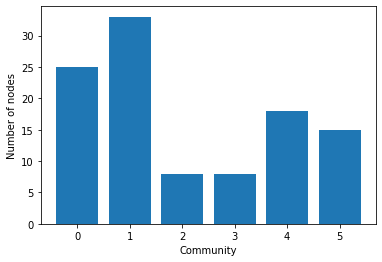

In [ ]:
community_index = []
number_of_nodes = []

for index, n in pairs:
    community_index.append(str(index))
    number_of_nodes.append(n)   
    
    
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")

### Centrality in communities

In [ ]:
list_community_sets_library

[{'Aemon',
  'Alliser',
  'Bowen',
  'Craster',
  'Cressen',
  'Dalla',
  'Davos',
  'Eddison',
  'Gilly',
  'Grenn',
  'Janos',
  'Jon',
  'Karl',
  'Mance',
  'Melisandre',
  'Orell',
  'Qhorin',
  'Rattleshirt',
  'Salladhor',
  'Samwell',
  'Shireen',
  'Stannis',
  'Styr',
  'Val',
  'Ygritte'},
 {'Aerys',
  'Amory',
  'Balon',
  'Bronn',
  'Cersei',
  'Chataya',
  'Doran',
  'Elia',
  'Ellaria',
  'Gregor',
  'Ilyn',
  'Jaime',
  'Joffrey',
  'Kevan',
  'Lancel',
  'Loras',
  'Mace',
  'Margaery',
  'Meryn',
  'Myrcella',
  'Oberyn',
  'Olenna',
  'Podrick',
  'Pycelle',
  'Qyburn',
  'Renly',
  'Sansa',
  'Shae',
  'Tommen',
  'Tyrion',
  'Tywin',
  'Varys',
  'Walton'},
 {'Anguy', 'Arya', 'Beric', 'Eddard', 'Gendry', 'Robert', 'Sandor', 'Thoros'},
 {'Bran', 'Hodor', 'Jojen', 'Luwin', 'Meera', 'Nan', 'Rickon', 'Theon'},
 {'Brienne',
  'Brynden',
  'Catelyn',
  'Edmure',
  'Hoster',
  'Jeyne',
  'Jon Arryn',
  'Lothar',
  'Lysa',
  'Marillion',
  'Petyr',
  'Ramsay',
  'Rickard',

In [ ]:
for comm in list_community_sets_library:
    subgraph = got_graph.subgraph(comm)
    print(subgraph.order())

25
33
8
8
18
15


In [ ]:
centr_comm = {}
# node -> centrality in the community subgraph

In [ ]:
for comm in list_community_sets_library:
    subgraph = got_graph.subgraph(comm)
    print(subgraph.order())
    print(nx.degree_centrality(subgraph))
    print("---")
    
    node_degrees  = nx.degree_centrality(subgraph)
    for n,d in node_degrees.items():
        centr_comm[n] = d

25
{'Rattleshirt': 0.16666666666666666, 'Karl': 0.041666666666666664, 'Orell': 0.041666666666666664, 'Ygritte': 0.16666666666666666, 'Alliser': 0.125, 'Grenn': 0.16666666666666666, 'Eddison': 0.125, 'Cressen': 0.041666666666666664, 'Gilly': 0.16666666666666666, 'Styr': 0.08333333333333333, 'Craster': 0.20833333333333331, 'Dalla': 0.125, 'Melisandre': 0.16666666666666666, 'Janos': 0.20833333333333331, 'Davos': 0.20833333333333331, 'Jon': 0.75, 'Samwell': 0.5, 'Mance': 0.5, 'Qhorin': 0.20833333333333331, 'Salladhor': 0.041666666666666664, 'Aemon': 0.16666666666666666, 'Val': 0.125, 'Shireen': 0.041666666666666664, 'Stannis': 0.20833333333333331, 'Bowen': 0.08333333333333333}
---
33
{'Doran': 0.03125, 'Podrick': 0.15625, 'Tywin': 0.4375, 'Pycelle': 0.125, 'Oberyn': 0.21875, 'Chataya': 0.0625, 'Balon': 0.125, 'Meryn': 0.1875, 'Ilyn': 0.15625, 'Myrcella': 0.125, 'Amory': 0.03125, 'Tyrion': 0.8125, 'Sansa': 0.375, 'Cersei': 0.40625, 'Mace': 0.09375, 'Renly': 0.1875, 'Qyburn': 0.03125, 'Olenn

In [ ]:
centr_comm

{'Rattleshirt': 0.16666666666666666,
 'Karl': 0.041666666666666664,
 'Orell': 0.041666666666666664,
 'Ygritte': 0.16666666666666666,
 'Alliser': 0.125,
 'Grenn': 0.16666666666666666,
 'Eddison': 0.125,
 'Cressen': 0.041666666666666664,
 'Gilly': 0.16666666666666666,
 'Styr': 0.08333333333333333,
 'Craster': 0.20833333333333331,
 'Dalla': 0.125,
 'Melisandre': 0.16666666666666666,
 'Janos': 0.20833333333333331,
 'Davos': 0.20833333333333331,
 'Jon': 0.75,
 'Samwell': 0.5,
 'Mance': 0.5,
 'Qhorin': 0.20833333333333331,
 'Salladhor': 0.041666666666666664,
 'Aemon': 0.16666666666666666,
 'Val': 0.125,
 'Shireen': 0.041666666666666664,
 'Stannis': 0.20833333333333331,
 'Bowen': 0.08333333333333333,
 'Doran': 0.03125,
 'Podrick': 0.15625,
 'Tywin': 0.4375,
 'Pycelle': 0.125,
 'Oberyn': 0.21875,
 'Chataya': 0.0625,
 'Balon': 0.125,
 'Meryn': 0.1875,
 'Ilyn': 0.15625,
 'Myrcella': 0.125,
 'Amory': 0.03125,
 'Tyrion': 0.8125,
 'Sansa': 0.375,
 'Cersei': 0.40625,
 'Mace': 0.09375,
 'Renly': 0.18

In [ ]:
nx.set_node_attributes(got_graph, centr_comm, "centr_comm")
#important nodes in communites, centralities inside the community

In [ ]:
nx.write_gexf(G=got_graph,path="got_graph.gexf")

### Bridges

Yields e (edge) – An edge in the graph whose removal disconnects the graph 
(or causes the number of connected components to increase)

In [ ]:
nx.has_bridges(got_graph.to_undirected())

True

In [ ]:
nx.set_edge_attributes(got_graph, 0, name="is_bridge")

In [ ]:
for br in nx.bridges(got_graph.to_undirected(), root=None):
    #print("edge (src,target):", br)
    src,target = br
    got_graph[src][target]['is_bridge'] = 1 

### Local Bridges

A local bridge is an edge whose endpoints have no common neighbors. That is, the edge is not part of a triangle in the graph

The span of a local bridge is the shortest path length between the endpoints if the local bridge is removed.

In [ ]:
nx.set_edge_attributes(got_graph, 0, name="is_local_bridge")

for br in nx.local_bridges(got_graph, with_span=True, weight='None'):
    #print("edge (src,target, span):", br)
    src, target, span = br
    got_graph[src][target]['is_local_bridge'] = 1

In [ ]:
nx.write_gexf(G=got_graph,path="got_graph.gexf")